In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/components/dataset'
img_width, img_height = 150, 150


In [ ]:
!pip install -q keras
!pip install split-folders
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/components/dataset", output="dat", seed=1337, ratio=(.8, .2))


Copying files: 994 files [00:20, 49.58 files/s]


In [ ]:
# Preprocess the dataset

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/dat/train',
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
    )


validation_generator = test_datagen.flow_from_directory(
     '/content/dat/val',  # Path to the validation data directory
    target_size=(150, 150),  # Target size of the images
    batch_size=8,
    class_mode='categorical' ,  # Adjust this based on your problem
     shuffle= False
)


Found 795 images belonging to 5 classes.
Found 199 images belonging to 5 classes.


In [ ]:
from tensorflow import keras

from keras.models import Sequential
model = Sequential()

model = keras.Sequential()



model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
100/100 [==============================] - 11s 86ms/step - loss: 1.5550 - accuracy: 0.2742 - val_loss: 1.1889 - val_accuracy: 0.5025
Epoch 2/10
100/100 [==============================] - 6s 63ms/step - loss: 1.1839 - accuracy: 0.4642 - val_loss: 0.8622 - val_accuracy: 0.6332
Epoch 3/10
100/100 [==============================] - 8s 83ms/step - loss: 0.9963 - accuracy: 0.5824 - val_loss: 1.1349 - val_accuracy: 0.6432
Epoch 4/10
100/100 [==============================] - 8s 83ms/step - loss: 0.9180 - accuracy: 0.6025 - val_loss: 0.6514 - val_accuracy: 0.8241
Epoch 5/10
100/100 [==============================] - 6s 63ms/step - loss: 0.8533 - accuracy: 0.6528 - val_loss: 0.6406 - val_accuracy: 0.7487
Epoch 6/10
100/100 [==============================] - 8s 84ms/step - loss: 0.7264 - accuracy: 0.7245 - val_loss: 0.4856 - val_accuracy: 0.8543
Epoch 7/10
100/100 [==============================] - 6s 64ms/step - loss: 0.6124 - accuracy: 0.7912 - val_loss: 0.5029 - val_accuracy: 0.844

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')


25/25 [==============================] - 1s 21ms/step - loss: 0.5438 - accuracy: 0.8342
Test accuracy: 0.8341708779335022


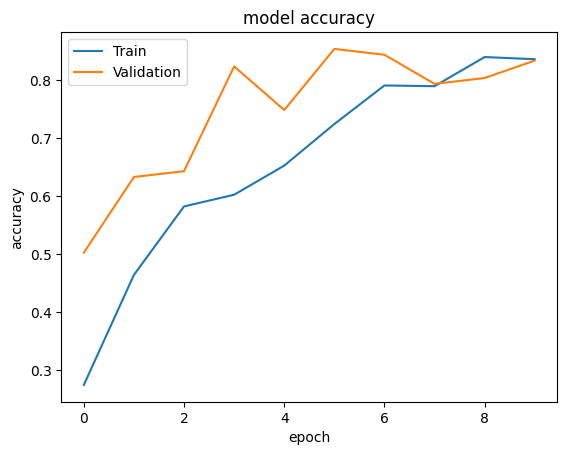

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


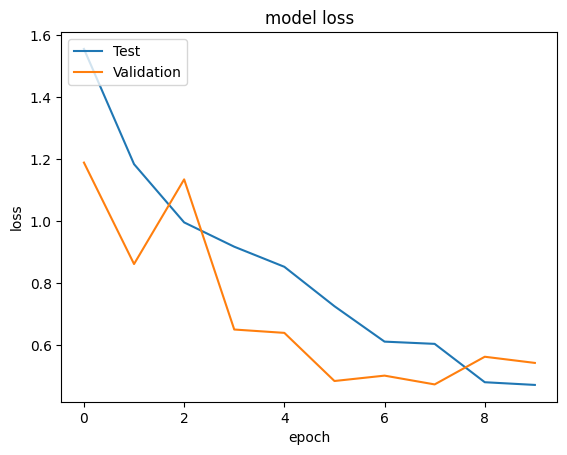

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()